In [1]:
# "jupyter notebook" in anaconda terminal
# This is a script that trains a Decision Tree Classifier on a dataset of murder records 
# to predict the race of a murderer based on the race of their victim. 
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


#1. import data
murder_data = pd.read_csv('database.csv', low_memory=False)

#2. clean data
murder_data.rename(columns={'Record ID':u'Record_ID','Agency Code':u'Agency_Code','Agency Name':u'Agency_Name','Agency Type':u'Agency_Type','Crime Type':u'Crime_Type',
                   'Crime Solved':u'Crime_Solved', 'Victim Sex':u'Victim_sex', 'Victim Age':u'Victim_Age','Victim Ethnicity':u'Victim_Ethnicity','Victim Race':u'Victim_Race',
                   'Perpetrator Age':u'Perpetrator_Age','Perpetrator Sex':'Perpetrator_Sex','Perpetrator Race':u'Perpetrator_Race','Perpetrator Ethnicity':u'Perpetrator_Ethnicity','Victim Count':u'Victim_Count',
                  'Perpetrator Count':u'Perpetrator_Count', 'Record Source':u'Record_Source'},inplace=True)

# split the data set into in- and output. in this case Victim Race and Perpetrator Race
# races are "White", "Black", "Unknown", "Asian/Pacific Islander" and "Native American/Alaska Native"
# encode races to numbers so it can be used by the machine learning algorithm
le_victim = LabelEncoder()
murder_data['Victim_Race']= le_victim.fit_transform(murder_data['Victim_Race'])
#0: Asian/pac, 1: black, 2: native american/ alaska native, 3: unknown, 4: white (sorted alphabetically)

le_perp = LabelEncoder()
murder_data['Perpetrator_Race'] = le_perp.fit_transform(murder_data['Perpetrator_Race'])
#0: Asian/pac, 1: black, 2: native american/ alaska native, 3: unknown, 4: white (sorted alphabetically)

le_victim.transform(le_victim.classes_)
le_perp.transform(le_perp.classes_)

X = murder_data[['Victim_Race']]
y = murder_data['Perpetrator_Race']

#3. split data into training/test (returns a tuple)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# changing the shape of y to (n_samples, )
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

#4. create a model
model = DecisionTreeClassifier()

#5. train the model
model.fit(X_train, y_train)

#6. make predicc
predictions = model.predict(X_test)

#7. eval n improve
score = accuracy_score(y_test, predictions)
score









0.6057278899844155

In [2]:
murder_data[murder_data["Perpetrator_Sex"]=="Male"].Perpetrator_Race.value_counts(normalize=True)

# White 0, Black 1, Unknown 2, Asian/pac 3, Native 4

4    0.490155
1    0.474885
3    0.013771
0    0.013638
2    0.007551
Name: Perpetrator_Race, dtype: float64

In [3]:
murder_data[murder_data["Perpetrator_Sex"]=="Female"].Perpetrator_Race.value_counts(normalize=True)

# White 0, Black 1, Unknown 2, Asian/pac 3, Native 4


1    0.507704
4    0.460204
2    0.011906
0    0.011885
3    0.008301
Name: Perpetrator_Race, dtype: float64

In [6]:
import pandas as pd

murder_data = pd.read_csv('database.csv', low_memory=False)

murder_data.rename(columns={'Record ID':u'Record_ID','Agency Code':u'Agency_Code','Agency Name':u'Agency_Name','Agency Type':u'Agency_Type','Crime Type':u'Crime_Type',
                   'Crime Solved':u'Crime_Solved', 'Victim Sex':u'Victim_sex', 'Victim Age':u'Victim_Age','Victim Ethnicity':u'Victim_Ethnicity','Victim Race':u'Victim_Race',
                   'Perpetrator Age':u'Perpetrator_Age','Perpetrator Sex':'Perpetrator_Sex','Perpetrator Race':u'Perpetrator_Race','Perpetrator Ethnicity':u'Perpetrator_Ethnicity','Victim Count':u'Victim_Count',
                  'Perpetrator Count':u'Perpetrator_Count', 'Record Source':u'Record_Source'},inplace=True)

murder_races = murder_data["Perpetrator_Race"].unique()
print(murder_races)

victim_races = murder_data["Victim_Race"].unique()
print(victim_races)




['Native American/Alaska Native' 'White' 'Unknown' 'Black'
 'Asian/Pacific Islander']
['Native American/Alaska Native' 'White' 'Black' 'Unknown'
 'Asian/Pacific Islander']


Total number of murders involving black victims found in database: 299899


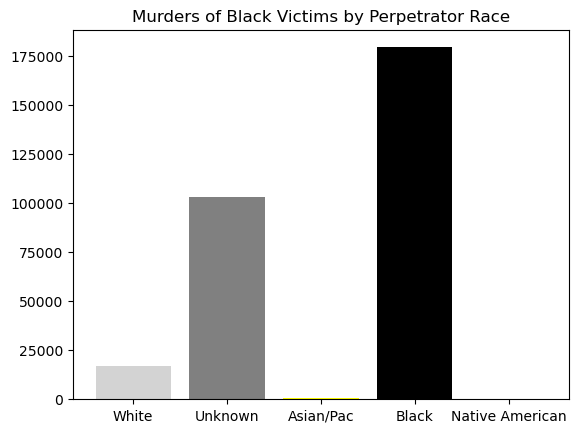

In [7]:
# total amount of black victims in murder database
black_victims = murder_data[murder_data["Victim_Race"] == "Black"].shape[0]
print("Total number of murders involving black victims found in database:", black_victims)

# amount of white people guilty of the murder of a black individual
white_perp_black_vic = murder_data[(murder_data["Perpetrator_Race"] == "White") & (murder_data["Victim_Race"] == "Black")].shape[0]
# ("Number of murders where the perp is white and the victim is black:", black_perp_white_vic)

# amount of black murders where the race of the perp is unknown
unknown_perp_black_vic = murder_data[(murder_data["Perpetrator_Race"] == "Unknown") & (murder_data["Victim_Race"] == "Black")].shape[0]
# ("Number of murders where the race of the perp is unknown and the victim is black:", unknown_perp_black_vic)

# amount of black murders where the race of the perp is asian
asian_perp_black_vic = murder_data[(murder_data["Perpetrator_Race"] == "Asian/Pacific Islander") & (murder_data["Victim_Race"] == "Black")].shape[0]
# ("Number of murders where the perp is asian/pacific and the victim is black:", asian_perp_black_vic)

# amount of black people murdered by native american
native_perp_black_vic = murder_data[(murder_data["Perpetrator_Race"] == "Native American/Alaska Native") & (murder_data["Victim_Race"] == "Black")].shape[0]
# ("Number of murders where the perp is native american and the victim is black:", native_perp_black_vic)

# amount of black people killing black people
black_perp_black_vic = murder_data[(murder_data["Perpetrator_Race"] == "Black") & (murder_data["Victim_Race"] == "Black")].shape[0]
# ("Number of murders where the perp is black and the victim is black:", black_perp_black_vic)


labels = ['White', 'Unknown', 'Asian/Pac', 'Black', 'Native American']
values = [white_perp_black_vic, unknown_perp_black_vic, asian_perp_black_vic, black_perp_black_vic, native_perp_black_vic]

# graph title and labels for axis
plt.title('Murders of Black Victims by Perpetrator Race')
plt.xlabel('')
plt.ylabel('')

# bar charts
plt.bar(labels, values, color=['lightgray', 'gray', 'yellow', 'black', 'red'])

# show graph
plt.show()


In [8]:
# number of murders in database perpetrated by men going by race
murder_data[murder_data["Perpetrator_Sex"]=="Male"].Perpetrator_Race.value_counts()

White                            195837
Black                            189736
Unknown                            5502
Asian/Pacific Islander             5449
Native American/Alaska Native      3017
Name: Perpetrator_Race, dtype: int64

In [9]:
# number of murders in database perpetrated by women going by race
murder_data[murder_data["Perpetrator_Sex"]=="Female"].Perpetrator_Race.value_counts()

Black                            24648
White                            22342
Native American/Alaska Native      578
Asian/Pacific Islander             577
Unknown                            403
Name: Perpetrator_Race, dtype: int64